K-Means

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./healthy_lifestyle_city_2021.csv', delimiter=',')
data.head(5)

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53


In [3]:
data = data.drop(columns=['City','Rank', 'Cost of a bottle of water(City)', 'Pollution(Index score) (City)','Annual avg. hours worked', 'Sunshine hours(City)', 'Number of take out places(City)', 'Outdoor activities(City)'])
data.head(5)

,Obesity levels(Country),Life expectancy(years) (Country),Happiness levels(Country),Cost of a monthly gym membership(City)
0,20.40%,81.2,7.44,£34.90
1,29.00%,82.1,7.22,£41.66
2,20.10%,81.0,7.29,£25.74
3,20.60%,81.8,7.35,£37.31
4,19.70%,79.8,7.64,£32.53


In [4]:
data = data.rename(columns={'Obesity levels(Country)': 'Obesity',
                            'Life expectancy(years) (Country)': 'Life expectancy',
                            'Happiness levels(Country)': 'Happiness levels',
                            'Cost of a monthly gym membership(City)': 'Gym price'})
data.head(5)

,Obesity,Life expectancy,Happiness levels,Gym price
0,20.40%,81.2,7.44,£34.90
1,29.00%,82.1,7.22,£41.66
2,20.10%,81.0,7.29,£25.74
3,20.60%,81.8,7.35,£37.31
4,19.70%,79.8,7.64,£32.53


In [5]:
data.dropna(subset=data.columns, inplace=True)

data['Obesity'] = data['Obesity'].str.replace('%', '')
data['Gym price'] = data['Gym price'].str.replace('£', '')

for coluna in data.columns:
    data[coluna] = data[coluna].astype(float)

data.head(5)

,Obesity,Life expectancy,Happiness levels,Gym price
0,20.4,81.2,7.44,34.90
1,29.0,82.1,7.22,41.66
2,20.1,81.0,7.29,25.74
3,20.6,81.8,7.35,37.31
4,19.7,79.8,7.64,32.53


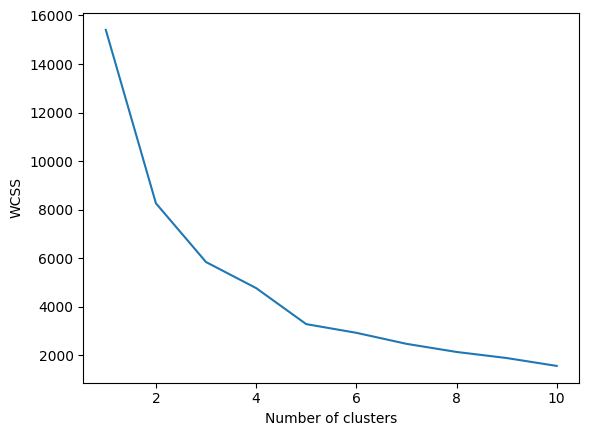

In [6]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters= 5)
model.fit(data)
group = model.predict(data)

In [8]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

col_name = [x for x in data.columns]
pca = PCA()
_ = pca.fit_transform(data[col_name])
PC_components = np.arange(pca.n_components_) + 1

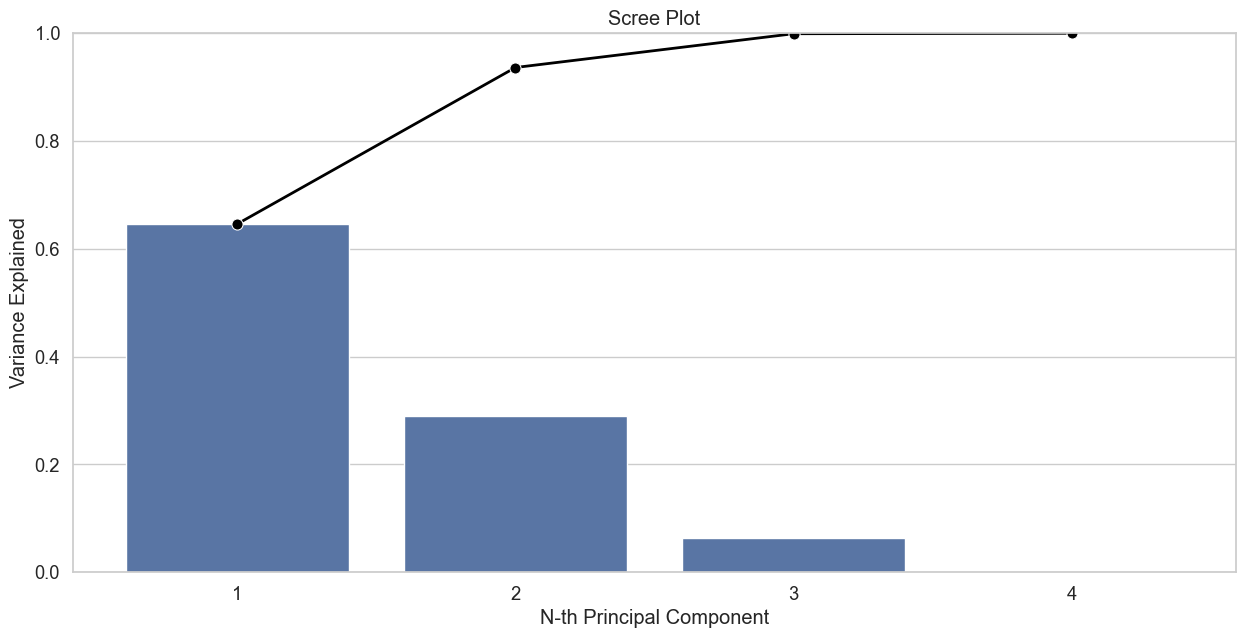

In [9]:
import seaborn as sns

_ = sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(15, 7))
_ = sns.barplot(x=PC_components, y=pca.explained_variance_ratio_, color='b')
_ = sns.lineplot(x=PC_components-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [10]:
pca = PCA(n_components=3)
pca_array = pca.fit_transform(data)

df_pca = pd.DataFrame(data=pca_array)
df_pca.columns = ['PC' + str(col+1) for col in df_pca.columns.values]
df_pca['group'] = group

df_pca.head(5)

,PC1,PC2,PC3,group
0,-4.812003,1.518017,-4.126084,4
1,1.318411,-7.504820,-3.091002,4
2,-13.837334,2.403078,-5.471620,0
3,-2.362026,1.120061,-4.279396,4
4,-7.309601,2.479360,-3.243483,4


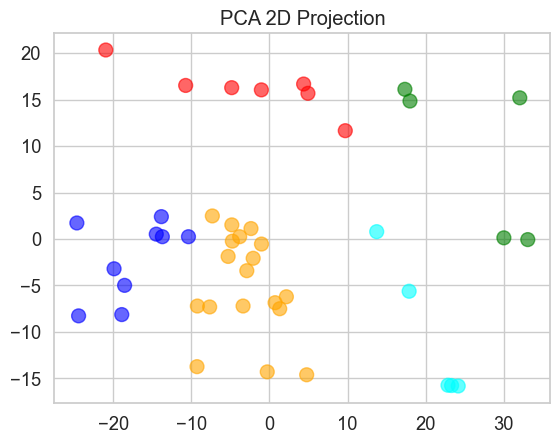

In [11]:
colors = ['blue', 'cyan', 'green', 'red', 'orange']
df_pca['color'] = df_pca['group'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})

plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['color'], alpha = 0.6, s=100)
plt.title('PCA 2D Projection')
plt.show()

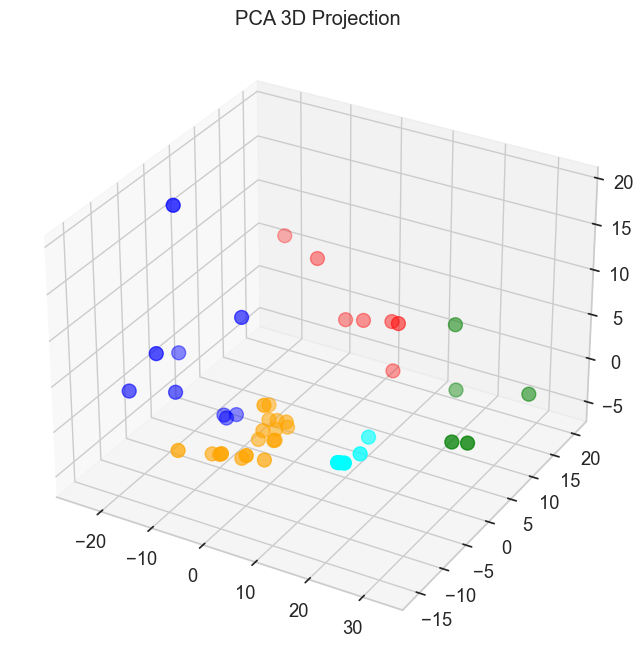

In [12]:
from mpl_toolkits import mplot3d

colors = ['blue', 'cyan', 'green', 'red', 'orange']
df_pca['color'] = df_pca['group'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})

fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection ="3d")

ax.scatter3D(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['color'], s=100)
ax.set_title('PCA 3D Projection')

plt.show()